Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_id           1000 non-null   object 
 1   product_name       1000 non-null   object 
 2   category           1000 non-null   object 
 3   price              1000 non-null   float64
 4   quantity_sold      1000 non-null   int64  
 5   total_revenue      1000 non-null   float64
 6   order_date         1000 non-null   object 
 7   customer_location  1000 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 62.6+ KB
None

Missing Values:
order_id             0
product_name         0
category             0
price                0
quantity_sold        0
total_revenue        0
order_date           0
customer_location    0
dtype: int64

Total Duplicate Rows: 0

Statistical Summary:
             price  quantity_sold  total_revenue
count  1000.000000    1

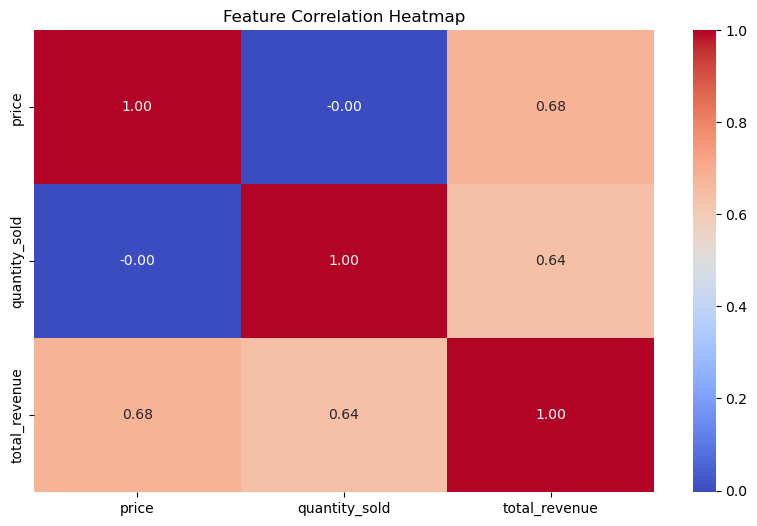

OSError: Cannot save file into a non-existent directory: 'data'

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('retail_sales_data.csv')

# Display basic info
print("Dataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nTotal Duplicate Rows: {duplicates}")
if duplicates > 0:
    df = df.drop_duplicates()
    print("Duplicates removed.")

# Display basic statistics
print("\nStatistical Summary:")
print(df.describe())

# Convert date column to datetime format if applicable
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])

# Plot sales trend over time if date and sales columns exist
if 'date' in df.columns and 'sales_amount' in df.columns:
    plt.figure(figsize=(12, 6))
    df.groupby(df['date'].dt.to_period("M")).sum()['sales_amount'].plot(kind='line', marker='o')
    plt.title('Monthly Sales Trend')
    plt.xlabel('Month')
    plt.ylabel('Total Sales')
    plt.grid(True)
    plt.show()

# Select only numeric columns for correlation
numeric_cols = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()


# Save cleaned dataset
df.to_csv('data/cleaned_sales_data.csv', index=False)
print("\nCleaned dataset saved as 'cleaned_sales_data.csv'")
